In [156]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
crimeraw = pd.read_csv(path)
crimeraw.columns = crimeraw.iloc[3]
crimeraw = crimeraw.drop([0,1,2,3,352,353,354], axis = 0)
crimeraw = crimeraw.reset_index().drop(columns='index')
crimeraw = crimeraw.drop(columns = ['Rape\n(revised\ndefinition)1', 'Arson3'] )
crimeraw.head()

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5


In [135]:
punctuation = [',','!','?','.']
for p in punctuation:
    for i in crimeraw.columns[1:11]:
        df2=crimeraw[i].str.replace(p,'')
#       df2=pd.DataFrame(df2)
        df2=pd.to_numeric(df2)
        crimeraw[i] = pd.DataFrame(df2)
crimeraw.shape

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [92]:
crimeraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 11 columns):
City                                    348 non-null object
Population                              348 non-null int64
Violent
crime                           348 non-null int64
Murder and
nonnegligent
manslaughter    348 non-null int64
Rape
(legacy
definition)2               348 non-null int64
Robbery                                 348 non-null int64
Aggravated
assault                      348 non-null int64
Property
crime                          348 non-null int64
Burglary                                348 non-null int64
Larceny-
theft                          348 non-null int64
Motor
vehicle
theft                     348 non-null int64
dtypes: int64(10), object(1)
memory usage: 30.0+ KB


In [93]:
crimeraw.isna().sum()

3
City                                      0
Population                                0
Violent\ncrime                            0
Murder and\nnonnegligent\nmanslaughter    0
Rape\n(legacy\ndefinition)2               0
Robbery                                   0
Aggravated\nassault                       0
Property\ncrime                           0
Burglary                                  0
Larceny-\ntheft                           0
Motor\nvehicle\ntheft                     0
dtype: int64

𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒 = 𝛼 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2 + 𝑀𝑢𝑟𝑑𝑒𝑟 + 𝑅𝑜𝑏𝑏𝑒𝑟

In [176]:
from sklearn.preprocessing import Binarizer
crimereg = pd.DataFrame(crimeraw['Property\ncrime'])
crimereg.columns = ['Property_Crime']
crimereg['Population'] = crimeraw['Population']
crimereg['Population_sq'] = crimeraw['Population']**2
X = crimeraw['Murder and\nnonnegligent\nmanslaughter'].values.reshape(-1, 1)
crimereg['Murder'] = Binarizer().fit(X).transform(X)
X = crimeraw['Robbery'].values.reshape(-1,1)
crimereg['Robbery'] = Binarizer().fit(X).transform(X)
crimereg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
Property_Crime    348 non-null int64
Population        348 non-null int64
Population_sq     348 non-null int64
Murder            348 non-null int64
Robbery           348 non-null int64
dtypes: int64(5)
memory usage: 13.7 KB


In [109]:
crimereg.head()

,Property Crime,Population,Population_sq,Murder,Robbery
0,12,1861,3463321,0,0
1,24,2577,6640929,0,0
2,16,2846,8099716,0,0
3,4090,97956,9595377936,1,1
4,223,6388,40806544,0,1


In [96]:
crimeraw.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft'],
      dtype='object', name=3)

{'whiskers': [<matplotlib.lines.Line2D at 0x13d084dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x13d08c780>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d084c88>],
 'medians': [<matplotlib.lines.Line2D at 0x13d08ce10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d08cef0>],
 'means': []}

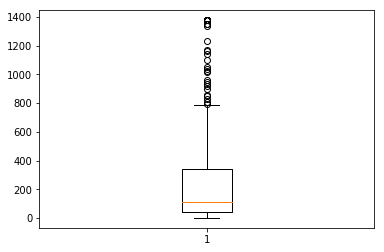

In [180]:
plt.boxplot(crimereg['Property_Crime'])

In [178]:
up_quantile = crimereg['Property_Crime'].quantile(0.95)
crimereg['Property_Crime'] = np.where(crimereg['Property_Crime'] > up_quantile, up_quantile, crimereg['Property_Crime'])

In [179]:
crimereg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
Property_Crime    348 non-null float64
Population        348 non-null int64
Population_sq     348 non-null int64
Murder            348 non-null int64
Robbery           348 non-null int64
dtypes: float64(1), int64(4)
memory usage: 13.7 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x13d343320>,
 'caps': [<matplotlib.lines.Line2D at 0x13d3439b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13d33aeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x13d343dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x13d34e3c8>],
 'means': []}

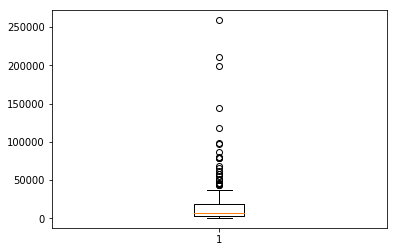

In [199]:
plt.boxplot(crimereg['Population'])

In [198]:
true = crimereg['Population'] == crimereg['Population'].max() 
index = true[true == True].index[0]
crimereg = crimereg.drop([index], axis = 0)
crimereg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 5 columns):
Property_Crime    347 non-null float64
Population        347 non-null int64
Population_sq     347 non-null int64
Murder            347 non-null int64
Robbery           347 non-null int64
dtypes: float64(1), int64(4)
memory usage: 16.3 KB


216